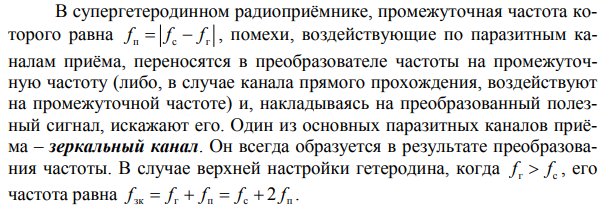
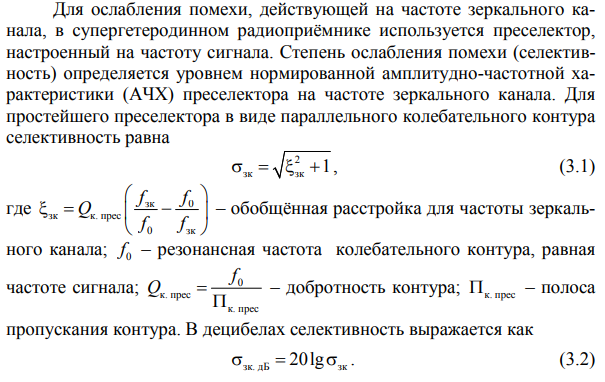

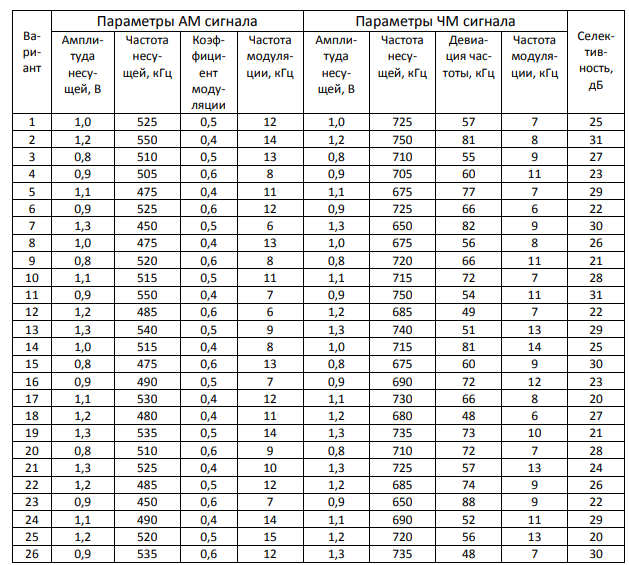

### Домашнее задание вариант 15

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
from scipy.special import jv  # Импорт функции Бесселя

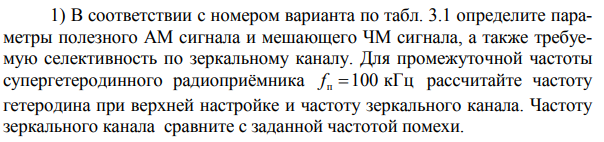

Амплитуда несущей: 0.9 В
Амплитуда боковых составляющих: 0.18000000000000002 В
Нижняя боковая частота: 543.0 кГц
Верхняя боковая частота: 557.0 кГц
Ширина спектра: 14.0 кГц
Исходные параметры:
Индекс модуляции (β): 4.909090909090909
Ширина спектра: 130.0 кГц


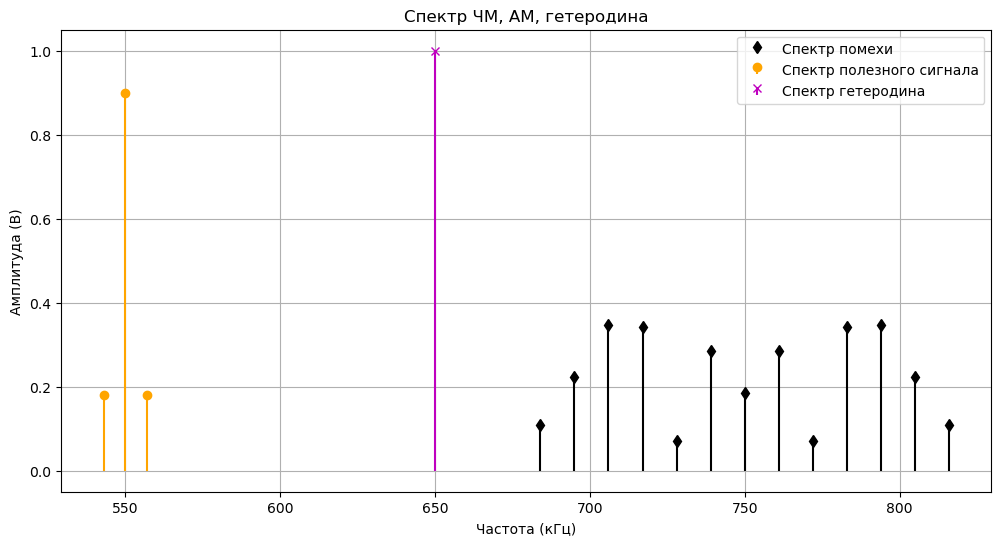

fгв = 650000
fгн = 450000
Ширина спектра = 14000
Полоса пропускания колебательного контура = 21000
Индуктивность катушки = 0.0011
Ёмкость конденсатора = 2.30275e-09
Резонансное сопротивление колебательного контура = 3291.19
Коэф. передачи ИТУН = 0.000303841
Частота зеркального канала = 750000


In [3]:
# Исходные данные
# Семён
# U_0 = 0.8
# f_s = 475e3
# m = 0.6
# F_m = 13e3

# # Заданные параметры
# U0 = 0.8 # Амплитуда несущего колебания
# f0 = 675e3  # Частота несущей 
# dev = 60e3  # Девиация частоты 
# FM = 9e3  # Частота модуляции 

# # Серега
# U_0 = 1.1
# f_s = 475e3
# m = 0.4
# F_m = 11e3

# # Заданные параметры
# U0 = 1.1 # Амплитуда несущего колебания
# f0 = 675e3  # Частота несущей 
# dev = 77e3  # Девиация частоты 
# FM = 7e3  # Частота модуляции 

#Гэсэр
U_0 = 0.9
f_s = 550e3
m = 0.4
F_m = 7e3

U0 = 0.9 # Амплитуда несущего колебания
f0 = 750e3  # Частота несущей 
dev = 54e3  # Девиация частоты 
FM = 11e3  # Частота модуляции 

f_p = 100e3 # промежуточная частота

f_g_v = f_p + f_s # верхняя настройка гетеродина

# Параметры спектра
carrier_amplitude = U_0  # Амплитуда несущей
sideband_amplitude = m * U_0 / 2  # Амплитуда боковых составляющих
lower_sideband_freq = f_s - F_m  # Нижняя боковая частота
upper_sideband_freq = f_s + F_m  # Верхняя боковая частота
spectrum_width = 2 * F_m  # Ширина спектра

# Вывод параметров
print(f"Амплитуда несущей: {carrier_amplitude} В")
print(f"Амплитуда боковых составляющих: {sideband_amplitude} В")
print(f"Нижняя боковая частота: {lower_sideband_freq / 1e3} кГц")
print(f"Верхняя боковая частота: {upper_sideband_freq / 1e3} кГц")
print(f"Ширина спектра: {spectrum_width / 1e3} кГц")

# Составляющие спектра АМ сигнала
frequencies_1 = [lower_sideband_freq, f_s, upper_sideband_freq]
amplitudes_1 = [sideband_amplitude, carrier_amplitude, sideband_amplitude]


# Функция для расчёта параметров ЧМ сигнала
def calculate_fm_parameters(dev, FM):
    beta = dev / FM  # Индекс модуляции
    spectrum_width = 2 * (dev + FM)  # Ширина спектра
    return beta, spectrum_width

# Исходные данные
beta, spectrum_width = calculate_fm_parameters(dev, FM)
print(f"Исходные параметры:")
print(f"Индекс модуляции (β): {beta}")
print(f"Ширина спектра: {spectrum_width / 1e3} кГц")

# Функция для построения спектра
def plot_spectrum(f0, FM, beta, title, frequencies_1, amplitudes_1 ):
    # Частоты боковых полос
    plt.figure(figsize=(12, 6))
    n = int(np.ceil(beta)) + 1  # Количество боковых полос
    frequencies = [f0 + k * FM for k in range(-n, n+1)]
    amplitudes = [U0 * np.abs(jv(k, beta)) for k in range(-n, n+1)]  # Амплитуды (функции Бесселя)

    # Построение спектра
    plt.stem([f / 1e3 for f in frequencies], amplitudes, basefmt=" ", markerfmt = 'd',linefmt = 'black', label="Спектр помехи")
    plt.stem([f / 1e3 for f in frequencies_1], amplitudes_1, basefmt=" ", markerfmt = 'o', linefmt = 'orange', label="Спектр полезного сигнала")
    plt.stem(f_g_v / 1e3, 1, basefmt=" ", markerfmt = 'x', linefmt = 'm', label="Спектр гетеродина")
    plt.title(title)
    plt.xlabel("Частота (кГц)")
    plt.ylabel("Амплитуда (В)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Построение спектров
plot_spectrum(f0, FM, beta, "Спектр ЧМ, АМ, гетеродина", frequencies_1, amplitudes_1)


#-------------------------------------------------------------------------------------
# Расчёт параметров колебательного контура
# Супергетеродин

f_g_n = f_s - f_p
Delta_f_AM = 2 * F_m
P_kFT = 1.5 * Delta_f_AM

f_mirror = f_g_v + f_p # Частота зеркального канала

f_0 = f_p
L_kFT_sup = 1.1e-3
C_kFT_sup = 1 / (L_kFT_sup * (2 * np.pi * f_0) ** 2)
R_kFT_sup = 1 / (2 * np.pi * P_kFT * C_kFT_sup)
K_ITUN_sup = 1 / R_kFT_sup

variables = [
    ('fгв', f_g_v),
    ('fгн', f_g_n),
    ('Ширина спектра', Delta_f_AM),
    ('Полоса пропускания колебательного контура', P_kFT),
    ('Индуктивность катушки', L_kFT_sup),
    ('Ёмкость конденсатора', C_kFT_sup),
    ('Резонансное сопротивление колебательного контура', R_kFT_sup),
    ('Коэф. передачи ИТУН', K_ITUN_sup),
    ('Частота зеркального канала', f_mirror)
]

for name, value in variables:
    print(f"{name} = {value:.6g}")  # Форматирование для удобного отображения


Параметры сигнала на высокой частоте
Амплитуда несущей: 0.45 В
Амплитуда боковых составляющих: 0.09000000000000001 В
Нижняя боковая частота: 1193.0 кГц
Верхняя боковая частота: 1207.0 кГц
Центральная частота: 1200.0 кГц

Параметры сигнала на низкой частоте
Амплитуда несущей: 0.45 В
Амплитуда боковых составляющих: 0.09000000000000001 В
Нижняя боковая частота: 93.0 кГц
Верхняя боковая частота: 107.0 кГц
Центральная частота: 100.0 кГц


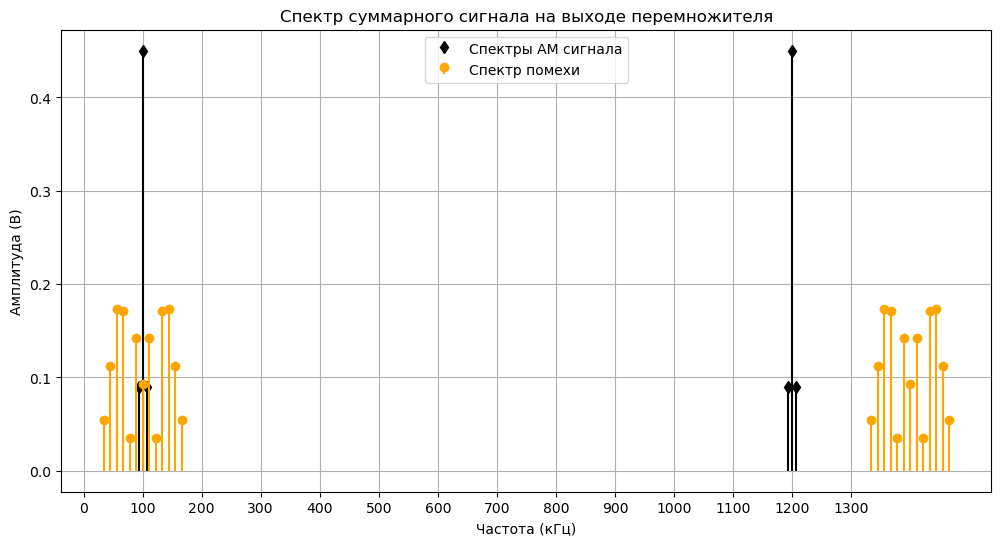

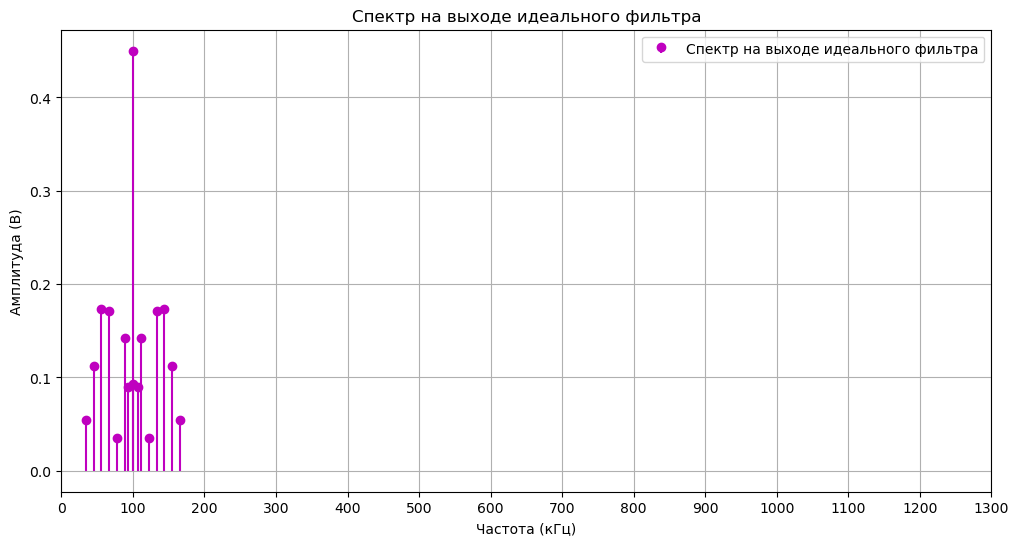

In [4]:
U_0 = 0.45
f_s_1 = f_s + f_g_v
f_s_2 = f_g_v - f_s

# Параметры спектра
carrier_amplitude = U_0  # Амплитуда несущей
sideband_amplitude = m * U_0 / 2  # Амплитуда боковых составляющих
spectrum_width = 2 * F_m  # Ширина спектра

lower_sideband_freq_1 = f_s_1 - F_m  # Нижняя боковая частота
upper_sideband_freq_1 = f_s_1 + F_m  # Верхняя боковая частота

lower_sideband_freq_2 = f_s_2 - F_m  # Нижняя боковая частота
upper_sideband_freq_2 = f_s_2 + F_m  # Верхняя боковая частота

noise_f1 = f0 + f_g_v
noise_f2 = f0 - f_g_v

# Вывод параметров
print ("Параметры сигнала на высокой частоте")
print(f"Амплитуда несущей: {carrier_amplitude} В")
print(f"Амплитуда боковых составляющих: {sideband_amplitude} В")
print(f"Нижняя боковая частота: {lower_sideband_freq_1 / 1e3} кГц")
print(f"Верхняя боковая частота: {upper_sideband_freq_1 / 1e3} кГц")
print(f"Центральная частота: {f_s_1 / 1e3} кГц")
print()
print ("Параметры сигнала на низкой частоте")
print(f"Амплитуда несущей: {carrier_amplitude} В")
print(f"Амплитуда боковых составляющих: {sideband_amplitude} В")
print(f"Нижняя боковая частота: {lower_sideband_freq_2 / 1e3} кГц")
print(f"Верхняя боковая частота: {upper_sideband_freq_2 / 1e3} кГц")
print(f"Центральная частота: {f_s_2 / 1e3} кГц")

# Построение спектра
frequencies = [lower_sideband_freq_1, f_s_1, upper_sideband_freq_1, lower_sideband_freq_2, f_s_2, upper_sideband_freq_2]
amplitudes = [sideband_amplitude, carrier_amplitude, sideband_amplitude, sideband_amplitude, carrier_amplitude, sideband_amplitude]

new_xticks = np.arange(0, 1400, 100)  # Задаем метки от 0 до 42 мкс с шагом 2 мкс

# Функция для построения спектра
def plot_spectrum(noise_f1, noise_f2, FM, beta, title1,title2, frequencies, amplitudes ):
    # Частоты боковых полос
    plt.figure(figsize=(12, 6))
    n = int(np.ceil(beta)) + 1  # Количество боковых полос
    frequencies_1 = [noise_f1 + k * FM for k in range(-n, n+1)]
    amplitudes_1 = [U0 * 0.5 * np.abs(jv(k, beta)) for k in range(-n, n+1)]  # Амплитуды (функции Бесселя)

    frequencies_2 = [noise_f2 + k * FM for k in range(-n, n+1)]
    amplitudes_2 = [U0 * 0.5 * np.abs(jv(k, beta)) for k in range(-n, n+1)]  # Амплитуды (функции Бесселя)

    Frequencies_output_mult = frequencies_1 + frequencies_2
    Ampl_output_mult = amplitudes_1 + amplitudes_2



    Ampl_output_filter = [sideband_amplitude, carrier_amplitude, sideband_amplitude] + amplitudes_2
    Frequencies_output_filter = [lower_sideband_freq_2, f_s_2, upper_sideband_freq_2] + frequencies_2

    
    # Построение спектра
    plt.stem([f / 1e3 for f in frequencies], amplitudes, basefmt=" ", markerfmt = 'd',linefmt = 'black', label="Спектры АМ сигнала")
    plt.stem([f / 1e3 for f in Frequencies_output_mult], Ampl_output_mult, basefmt=" ", markerfmt = 'o', linefmt = 'orange', label="Спектр помехи")

    plt.title(title1)
    plt.xlabel("Частота (кГц)")
    plt.ylabel("Амплитуда (В)")
    plt.grid(True)
    plt.legend()
    plt.xticks(new_xticks)
    plt.show()


    plt.figure(figsize=(12, 6))
    plt.stem([f / 1e3 for f in Frequencies_output_filter], Ampl_output_filter, basefmt=" ", markerfmt = 'o', linefmt = 'm', label="Спектр на выходе идеального фильтра")
    plt.xlabel("Частота (кГц)")
    plt.ylabel("Амплитуда (В)")
    plt.grid(True)
    plt.legend()
    plt.title(title2)
    plt.xticks(new_xticks)
    plt.show()


# Построение спектров
plot_spectrum(noise_f1, noise_f2, FM, beta, "Спектр суммарного сигнала на выходе перемножителя","Спектр на выходе идеального фильтра", frequencies, amplitudes)


In [5]:
# Семён
#selectivity_Db = 30 # Селективность в децибелах
selectivity_1 = 31.62278
f_signal_1 = 478e3
f_zerkalo_1 = 675000

Lk_press = 200e-6
Ck_press = 1 / (Lk_press * (2*np.pi*f_signal_1)**2)
ksi_mirror = np.sqrt(selectivity_1**2 - 1)
Pk_press = f_signal_1 * ((f_zerkalo_1/f_signal_1) - (f_signal_1/f_zerkalo_1)) / ksi_mirror

R_press = 1 / (2 * np.pi * Pk_press * Ck_press)
K_press = 1 / R_press

variables = [
    ('Полоса пропускания преселектора', Pk_press),
    ('Индуктивность катушки преселектора', Lk_press),
    ('Ёмкость конденсатора преселектора', Ck_press),
    ('Резонансное сопротивление преселектора', R_press),
    ('Коэф. передачи ИТУН преселектора', K_press),
]

print("Семён")
for name, value in variables:
    print(f"{name} = {value:.6g}")  # Форматирование для удобного отображения


# Гэсэр
#selectivity_Db = 31 # Селективность в децибелах
selectivity_2 = 35.481339
f_signal_2 = 555e3
f_zerkalo_2 = 750000

Lk_press = 200e-6
Ck_press = 1 / (Lk_press * (2*np.pi*f_signal_2)**2)
ksi_mirror = np.sqrt(selectivity_2**2 - 1)
Pk_press = f_signal_2 * ((f_zerkalo_2/f_signal_2) - (f_signal_2/f_zerkalo_2)) / ksi_mirror

R_press = 1 / (2 * np.pi * Pk_press * Ck_press)
K_press = 1 / R_press

variables = [
    ('Полоса пропускания преселектора', Pk_press),
    ('Индуктивность катушки преселектора', Lk_press),
    ('Ёмкость конденсатора преселектора', Ck_press),
    ('Резонансное сопротивление преселектора', R_press),
    ('Коэф. передачи ИТУН преселектора', K_press),
]
print("Гэсэр")
for name, value in variables:
    print(f"{name} = {value:.6g}")  # Форматирование для удобного отображения

    # Серега
#selectivity_Db = 29 # Селективность в децибелах
selectivity_2 = 28
f_signal_2 = 475e3
f_zerkalo_2 = 675000

Lk_press = 200e-6
Ck_press = 1 / (Lk_press * (2*np.pi*f_signal_2)**2)
ksi_mirror = np.sqrt(selectivity_2**2 - 1)
Pk_press = f_signal_2 * ((f_zerkalo_2/f_signal_2) - (f_signal_2/f_zerkalo_2)) / ksi_mirror

R_press = 1 / (2 * np.pi * Pk_press * Ck_press)
K_press = 1 / R_press

variables = [
    ('Полоса пропускания преселектора', Pk_press),
    ('Индуктивность катушки преселектора', Lk_press),
    ('Ёмкость конденсатора преселектора', Ck_press),
    ('Резонансное сопротивление преселектора', R_press),
    ('Коэф. передачи ИТУН преселектора', K_press),
]
print("Серёга")
for name, value in variables:
    print(f"{name} = {value:.6g}")  # Форматирование для удобного отображения


Семён
Полоса пропускания преселектора = 10646.6
Индуктивность катушки преселектора = 0.0002
Ёмкость конденсатора преселектора = 5.54312e-10
Резонансное сопротивление преселектора = 26968.5
Коэф. передачи ИТУН преселектора = 3.70803e-05
Гэсэр
Полоса пропускания преселектора = 9566.57
Индуктивность катушки преселектора = 0.0002
Ёмкость конденсатора преселектора = 4.11173e-10
Резонансное сопротивление преселектора = 40461.3
Коэф. передачи ИТУН преселектора = 2.4715e-05
Серёга
Полоса пропускания преселектора = 12177.1
Индуктивность катушки преселектора = 0.0002
Ёмкость конденсатора преселектора = 5.61336e-10
Резонансное сопротивление преселектора = 23283.8
Коэф. передачи ИТУН преселектора = 4.29483e-05



Селективность (или избирательность) – это способность РПУ выделить полезный сигнал из смеси с мешающими сигналами, отличающимися от полезного по
какому-либо параметру.

Амплитуда несущей: 0.55 В
Амплитуда боковых составляющих: 0.11000000000000001 В
Нижняя боковая частота: 464.0 кГц
Верхняя боковая частота: 486.0 кГц
Ширина спектра: 22.0 кГц
Исходные параметры:
Индекс модуляции (β): 11.0
Ширина спектра: 168.0 кГц


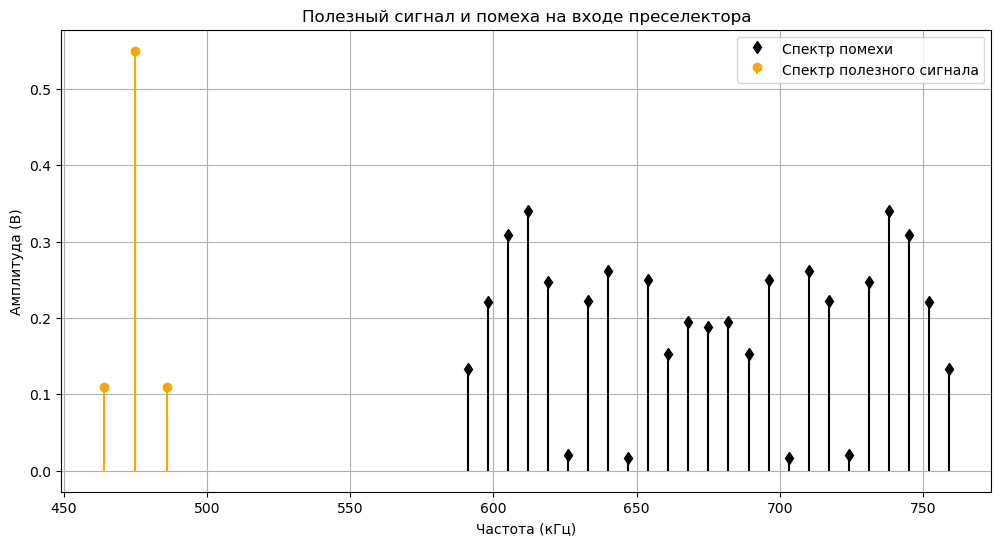

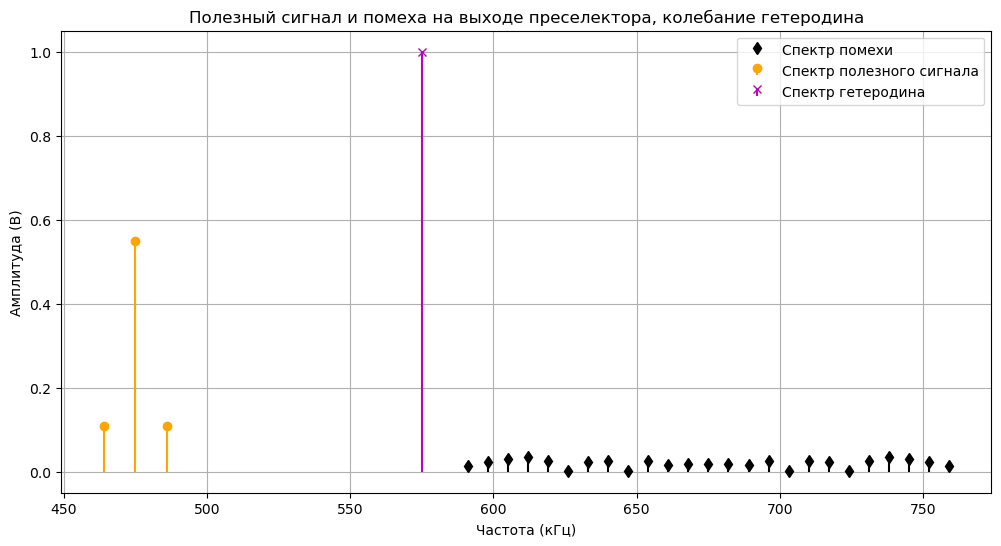

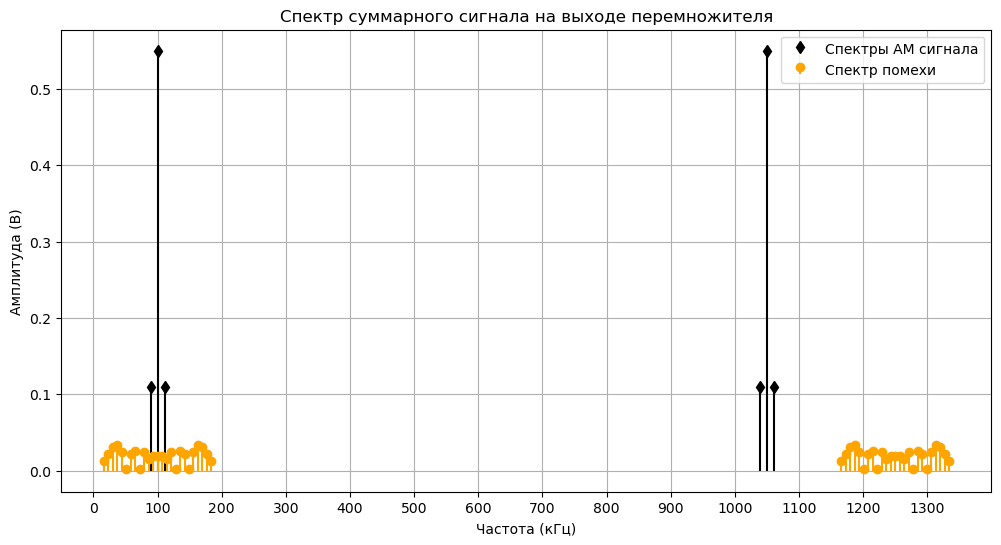

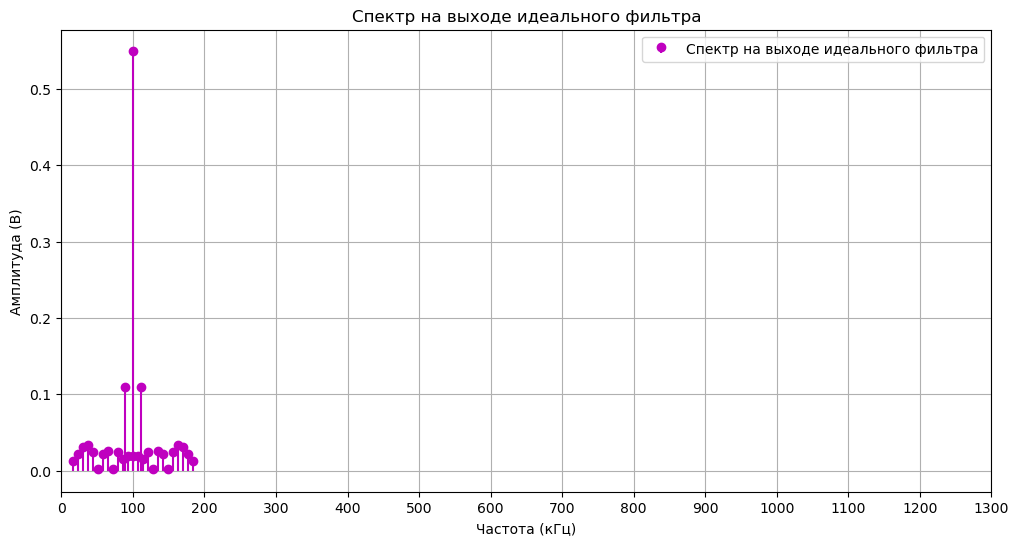

In [6]:
# Исходные данные
# # Семён
# U_0 = 0.8
# f_s = 475e3
# m = 0.6
# F_m = 13e3

# # Заданные параметры
# U0 = 0.8 # Амплитуда несущего колебания
# f0 = 675e3  # Частота несущей 
# dev = 60e3  # Девиация частоты 
# FM = 9e3  # Частота модуляции 

# Серега
U_0 = 1.1
f_s = 475e3
m = 0.4
F_m = 11e3

# Заданные параметры
U0 = 1.1 # Амплитуда несущего колебания
f0 = 675e3  # Частота несущей 
dev = 77e3  # Девиация частоты 
FM = 7e3  # Частота модуляции 

# Гэсэр
# U_0 = 0.9
# f_s = 550e3
# m = 0.4
# F_m = 7e3

# U0 = 0.9 # Амплитуда несущего колебания
# f0 = 750e3  # Частота несущей 
# dev = 54e3  # Девиация частоты 
# FM = 11e3  # Частота модуляции 

f_p = 100e3 # промежуточная частота

f_g_v = f_p + f_s # верхняя настройка гетеродина

U_0 = 0.55

# Параметры спектра
carrier_amplitude = U_0  # Амплитуда несущей
sideband_amplitude = m * U_0 / 2  # Амплитуда боковых составляющих
lower_sideband_freq = f_s - F_m  # Нижняя боковая частота
upper_sideband_freq = f_s + F_m  # Верхняя боковая частота
spectrum_width = 2 * F_m  # Ширина спектра

# Вывод параметров
print(f"Амплитуда несущей: {carrier_amplitude} В")
print(f"Амплитуда боковых составляющих: {sideband_amplitude} В")
print(f"Нижняя боковая частота: {lower_sideband_freq / 1e3} кГц")
print(f"Верхняя боковая частота: {upper_sideband_freq / 1e3} кГц")
print(f"Ширина спектра: {spectrum_width / 1e3} кГц")

# Составляющие спектра АМ сигнала
frequencies_1 = [lower_sideband_freq, f_s, upper_sideband_freq]
amplitudes_1 = [sideband_amplitude, carrier_amplitude, sideband_amplitude]


# Функция для расчёта параметров ЧМ сигнала
def calculate_fm_parameters(dev, FM):
    beta = dev / FM  # Индекс модуляции
    spectrum_width = 2 * (dev + FM)  # Ширина спектра
    return beta, spectrum_width

# Исходные данные
beta, spectrum_width = calculate_fm_parameters(dev, FM)
print(f"Исходные параметры:")
print(f"Индекс модуляции (β): {beta}")
print(f"Ширина спектра: {spectrum_width / 1e3} кГц")

# Функция для построения спектра
def plot_spectrum(f0, FM, beta, title, frequencies_1, amplitudes_1 ):
    # Частоты боковых полос
    plt.figure(figsize=(12, 6))
    n = int(np.ceil(beta)) + 1  # Количество боковых полос
    frequencies = [f0 + k * FM for k in range(-n, n+1)]
    amplitudes = [U0 * np.abs(jv(k, beta)) for k in range(-n, n+1)]  # Амплитуды (функции Бесселя)

    # Построение спектра
    plt.stem([f / 1e3 for f in frequencies], amplitudes, basefmt=" ", markerfmt = 'd',linefmt = 'black', label="Спектр помехи")
    plt.stem([f / 1e3 for f in frequencies_1], amplitudes_1, basefmt=" ", markerfmt = 'o', linefmt = 'orange', label="Спектр полезного сигнала")
    #plt.stem(f_g_v / 1e3, 1, basefmt=" ", markerfmt = 'x', linefmt = 'm', label="Спектр гетеродина")
    plt.title(title)
    plt.xlabel("Частота (кГц)")
    plt.ylabel("Амплитуда (В)")
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_spectrum_1(f0, FM, beta, title, frequencies_1, amplitudes_1 ):
    # Частоты боковых полос
    plt.figure(figsize=(12, 6))
    n = int(np.ceil(beta)) + 1  # Количество боковых полос
    frequencies = [f0 + k * FM for k in range(-n, n+1)]
    amplitudes = [0.5 * 0.2 * U0 * np.abs(jv(k, beta)) for k in range(-n, n+1)]  # Амплитуды (функции Бесселя)


    # Построение спектра
    plt.stem([f / 1e3 for f in frequencies], amplitudes, basefmt=" ", markerfmt = 'd',linefmt = 'black', label="Спектр помехи")
    plt.stem([f / 1e3 for f in frequencies_1], amplitudes_1, basefmt=" ", markerfmt = 'o', linefmt = 'orange', label="Спектр полезного сигнала")
    plt.stem(f_g_v / 1e3, 1, basefmt=" ", markerfmt = 'x', linefmt = 'm', label="Спектр гетеродина")
    plt.title(title)
    plt.xlabel("Частота (кГц)")
    plt.ylabel("Амплитуда (В)")
    plt.grid(True)
    plt.legend()
    plt.show()    

# Построение спектров
plot_spectrum(f0, FM, beta, "Полезный сигнал и помеха на входе преселектора", frequencies_1, amplitudes_1)
plot_spectrum_1(f0, FM, beta, "Полезный сигнал и помеха на выходе преселектора, колебание гетеродина", frequencies_1, amplitudes_1)

f_s_1 = f_s + f_g_v
f_s_2 = f_g_v - f_s

# Параметры спектра
carrier_amplitude = U_0  # Амплитуда несущей
sideband_amplitude = m * U_0 / 2  # Амплитуда боковых составляющих
spectrum_width = 2 * F_m  # Ширина спектра

lower_sideband_freq_1 = f_s_1 - F_m  # Нижняя боковая частота
upper_sideband_freq_1 = f_s_1 + F_m  # Верхняя боковая частота

lower_sideband_freq_2 = f_s_2 - F_m  # Нижняя боковая частота
upper_sideband_freq_2 = f_s_2 + F_m  # Верхняя боковая частота

noise_f1 = f0 + f_g_v
noise_f2 = f0 - f_g_v

# Построение спектра
frequencies = [lower_sideband_freq_1, f_s_1, upper_sideband_freq_1, lower_sideband_freq_2, f_s_2, upper_sideband_freq_2]
amplitudes = [sideband_amplitude, carrier_amplitude, sideband_amplitude, sideband_amplitude, carrier_amplitude, sideband_amplitude]

new_xticks = np.arange(0, 1400, 100)  # Задаем метки от 0 до 42 мкс с шагом 2 мкс

# Функция для построения спектра
def plot_spectrum_2(noise_f1, noise_f2, FM, beta, title1,title2, frequencies, amplitudes ):
    # Частоты боковых полос
    plt.figure(figsize=(12, 6))
    n = int(np.ceil(beta)) + 1  # Количество боковых полос
    frequencies_1 = [noise_f1 + k * FM for k in range(-n, n+1)]
    amplitudes_1 = [0.5 * 0.2 * U0 * np.abs(jv(k, beta)) for k in range(-n, n+1)]  # Амплитуды (функции Бесселя)

    frequencies_2 = [noise_f2 + k * FM for k in range(-n, n+1)]
    amplitudes_2 = [0.5 * 0.2 * U0 * np.abs(jv(k, beta)) for k in range(-n, n+1)]  # Амплитуды (функции Бесселя)

    Frequencies_output_mult = frequencies_1 + frequencies_2
    Ampl_output_mult = amplitudes_1 + amplitudes_2



    Ampl_output_filter = [sideband_amplitude, carrier_amplitude, sideband_amplitude] + amplitudes_2
    Frequencies_output_filter = [lower_sideband_freq_2, f_s_2, upper_sideband_freq_2] + frequencies_2

    
    # Построение спектра
    plt.stem([f / 1e3 for f in frequencies], amplitudes, basefmt=" ", markerfmt = 'd',linefmt = 'black', label="Спектры АМ сигнала")
    plt.stem([f / 1e3 for f in Frequencies_output_mult], Ampl_output_mult, basefmt=" ", markerfmt = 'o', linefmt = 'orange', label="Спектр помехи")

    plt.title(title1)
    plt.xlabel("Частота (кГц)")
    plt.ylabel("Амплитуда (В)")
    plt.grid(True)
    plt.legend()
    plt.xticks(new_xticks)
    plt.show()


    plt.figure(figsize=(12, 6))
    plt.stem([f / 1e3 for f in Frequencies_output_filter], Ampl_output_filter, basefmt=" ", markerfmt = 'o', linefmt = 'm', label="Спектр на выходе идеального фильтра")
    plt.xlabel("Частота (кГц)")
    plt.ylabel("Амплитуда (В)")
    plt.grid(True)
    plt.legend()
    plt.title(title2)
    plt.xticks(new_xticks)
    plt.show()


# Построение спектров
plot_spectrum_2(noise_f1, noise_f2, FM, beta, "Спектр суммарного сигнала на выходе перемножителя","Спектр на выходе идеального фильтра", frequencies, amplitudes)
